In [1]:

import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import time


In [2]:
import decoupler as dc
import pandas as pd
import sys
import pickle
import tqdm
import scipy
import pickle
# https://github.com/johannesbjork/LaCroixColoR pamplemousse
colors = ["#EA7580","#F6A1A5","#F8CD9C","#1BB6AF","#088BBE","#172869"]
passionfruit = ["#C70E7B", "#FC6882","#A6E000","#1BB6AF","#6C6C9D","#172869"]

In [3]:
with open('/home/ec2-user/curation/heart_datasets/gg_250821_male_glia_deseq.anndata.p', 'rb') as fp:
    dds_m=pickle.load(fp)
with open('/home/ec2-user/curation/heart_datasets/gg_250821_female_glia_deseq.anndata.p', 'rb') as fp:
    dds_f=pickle.load(fp)

In [45]:
res_m = pd.read_csv('/home/ec2-user/curation/heart_datasets/deseq/gg_250821_xist_pres_vs_abs_donor_id_2samp_male.csv',index_col=0)
res_f = pd.read_csv('/home/ec2-user/curation/heart_datasets/deseq/gg_250821_xist_pres_vs_abs_donor_id_2samp_female.csv',index_col=0)

In [46]:
print(dds_m.obsm['design_matrix'].shape)
print(dds_f.obsm['design_matrix'].shape)


(450, 226)
(178, 90)


In [47]:
(1-(res_f['baseMean']>5)).mean()

0.6896352612838033

In [48]:
(1-(res_m['baseMean']>5)).mean()

0.7775959965354634

## Female DE genes

In [49]:
print('Female')
print('\nunfiltered')
print(len(res_f[(res_f['log2FoldChange'].abs()>0.25)&(res_f['padj']<0.05)]))
for x in res_f[(res_f['log2FoldChange'].abs()>0.25)&(res_f['padj']<0.05)].index:print(x,end='\t')
print('\n\nfiltered')
print(len(res_f[(res_f['baseMean']>5)&(res_f['log2FoldChange'].abs()>0.25)&(res_f['padj']<0.05)]))
for x in res_f[(res_f['baseMean']>5)&(res_f['log2FoldChange'].abs()>0.25)&(res_f['padj']<0.05)].index:print(x,end='\t')


Female

unfiltered
225
TMEM255B	MRPL23	TRAPPC1	PIK3C3	RPL13A	ZMAT5	COX7A1	DNAH1	HEXIM1	UTP15	TSR3	TAF6	ARHGAP17	TUBB4B	ABHD17A	MRPL34	CIC	BRSK1	SLC22A5	TMEM183A	MRPL28	CARD10	MTA1	NOSIP	EPB41L4A	SLFN13	RPS5	SPATA22	PDHB	PBDC1	KCTD15	EXOSC5	MAPK7	PRPS1	ALG3	MRPL11	SGIP1	KIF5A	TNNC1	DHH	ASF1A	LRP4-AS1	SPRED2	MRPL41	TPI1	NDUFS7	TP53TG1	HSDL1	TSPYL1	KLHL26	CPM	AJAP1	FSIP2	EBF1	RORA	NDUFA1	MIF4GD	ATP6V1F	ARHGAP10	MSL3	TSPO	COA3	TCEA2	ABCA9	BMP8B	SCRN2	LAMA2	CHADL	AKR7A2	RRP1	AHRR	PRDM5	LTBP1	SSH3	PSMB5	PTPRG	DNAJB9	SLC52A2	DEDD	MAGEH1	SNAPIN	ATP10B	TOMM7	BID	GAP43	NPDC1	DYRK1B	SNHG10	JMJD8	CRYGS	ETFB	SHARPIN	CCDC157	TMUB1	UBE2M	RPS14	NOA1	CREB3	MYL2	SOCS4	MVB12A	KLHDC8A	RPL15	MRFAP1	C17orf67	CCDC124	ENO2	NEU1	SMPX	FARSA	NDUFA6	RPL18A	ZNF554	UQCRQ	PCBP4	CCDC73	ZFYVE19	ABI3BP	ALG11	KLHDC8B	NTNG2	GJA1	EGFR	PDCD2	RBP1	COPRS	CFLAR	ZNF649	DCLK1	S100A1	VMA21	GRK5	RPS6	PRKCSH	THOP1	TOR3A	LSM10	STON1-GTF2A1L	CELF4	SLC6A8	PEX11G	ZNF688	SLC39A11	MKRN3	PSME2	GPS1	CLUH	CUTA	ANAPC13	SNX13	HSD17B14	TBL2	A

## Male DE genes

In [50]:
print('Male')
print('\nunfiltered')
print(len(res_m[(res_m['log2FoldChange'].abs()>0.25)&(res_m['padj']<0.05)].index))
for x in res_m[(res_m['log2FoldChange'].abs()>0.25)&(res_m['padj']<0.05)].index:print(x,end='\t')
print('\n\nfiltered')
print(len(res_m[(res_m['baseMean']>5)&(res_m['log2FoldChange'].abs()>0.25)&(res_m['padj']<0.05)].index))
for x in res_m[(res_m['baseMean']>5)&(res_m['log2FoldChange'].abs()>0.25)&(res_m['padj']<0.05)].index:print(x,end='\t')


Male

unfiltered
433
NNT-AS1	ARHGAP44	ATP2A2	LINC01091	SLC9A9	GALM	GAS2	NRCAM	SLC8A1	PDGFRB	GLCCI1	CRIM1	SYTL2	CHST11	MPRIP	RCAN2	MIDN	FGF12	PPM1L	ACTN2	MAF	APOD	CHRM2	STON2	TUSC3	OPCML	ROBO1	BACE2	TNC	EEF2K	KCNMA1	COL6A3	THRB	ZNF785	FGF14	MYBPC3	MFSD1	PLEKHA6	MYO18B	PXDNL	SERPINF1	TMOD1	DIAPH1	SCAMP2	SLC4A4	SEMA5A	EPB41L4A	TLE4	DLGAP1	SMOC2	MEIS2	PPM1G	RAD23A	MACROD2	MFAP5	NENF	TMEM108	MB	ENOX2	SYNPO2	ARHGAP6	ACTA1	MECOM	IGF1	CADPS	SVIP	TMTC1	CCSER1	MALT1	ALDH1A2	TMSB4X	DPF3	SERPINE2	FABP3	SLC20A1	MLF1	NPAS2	NMD3	CPNE2	TECRL	NFKBIZ	DPP10	WNK2	BCAP31	MGLL	ADCY5	AMMECR1	TCAP	SLC7A6OS	NES	GPC5	PDLIM5	GNA14	PELI1	RBFOX1	SLC25A4	SETBP1	TUBE1	PLCL1	PDE7B	PCDH7	PDE3A	LUM	LRIG1	CFD	CPE	PTGIS	ARHGAP10	DNAJC18	MDH2	CCDC141	USP31	DACH1	ZNF714	ZFPM2	KALRN	NEK11	INPP4B	LAMA2	PREX2	PRR16	TNNI3	GABRB3	DNM3	PDE7A	ADPRHL1	TMEM132C	ZNF208	SLC19A2	COL24A1	LTBP1	FRMD3	TRPM3	MARK2	ABCA10	VAV3	RGS6	RPL6	NR2F2	PLCL2	C10orf90	COPE	ARHGAP26	SPOCK1	ADAMTSL3	ZSWIM5	CASQ2	PSMA7	PLEKHH2	RPL41	SOBP	SVEP1	DYNLL1	VE

/home/ec2-user/miniconda/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


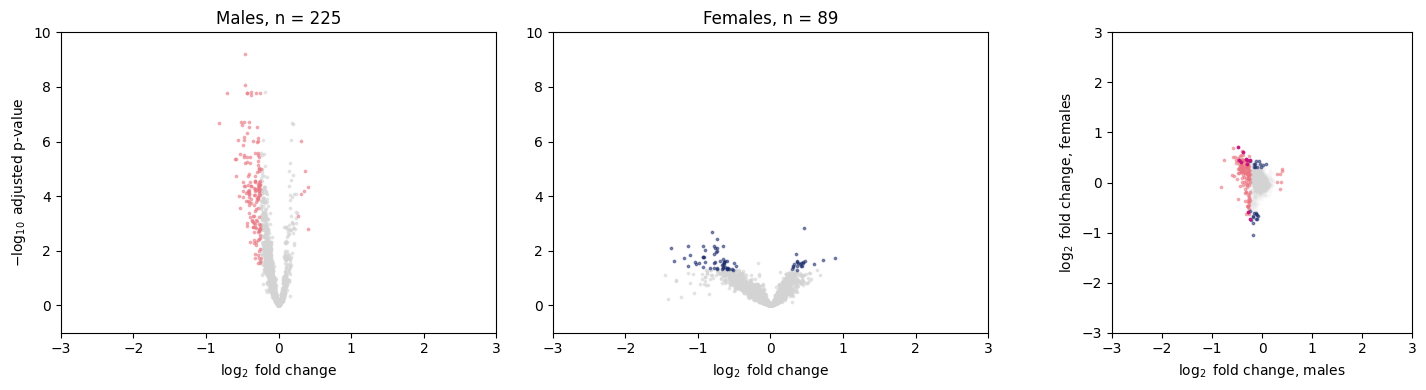

In [26]:
fld = 'padj'

fig1,ax1=plt.subplots(1,3,figsize=(15,4))

res_f = res_f[res_f['baseMean']>5]
res_m = res_m[res_m['baseMean']>5]

gfm = (res_m['log2FoldChange'].abs()>0.25)&(res_m['padj']<0.05)
ax1[0].scatter(res_m.loc[~gfm,'log2FoldChange'],-np.log10(res_m.loc[~gfm,fld]),3,'lightgray',alpha=0.5)
ax1[0].scatter(res_m.loc[gfm,'log2FoldChange'],-np.log10(res_m.loc[gfm,fld]),3,colors[0],alpha=0.5)

gff = (res_f['log2FoldChange'].abs()>0.25)&(res_f['padj']<0.05)
ax1[1].scatter(res_f.loc[~gff,'log2FoldChange'],-np.log10(res_f.loc[~gff,fld]),3,'lightgray',alpha=0.5)
ax1[1].scatter(res_f.loc[gff,'log2FoldChange'],-np.log10(res_f.loc[gff,fld]),3,colors[5],alpha=0.5)

ymax = 10
xmax = 3
ax1[0].set_xlim([-xmax,xmax])
ax1[1].set_xlim([-xmax,xmax])
ax1[0].set_ylim([-1,ymax])
ax1[1].set_ylim([-1,ymax])
ax1[0].set_xlabel(r'$\log_2$ fold change')
ax1[1].set_xlabel(r'$\log_2$ fold change')
ax1[0].set_ylabel(r'$-\log_{10}$ adjusted p-value')
nm = int(len(dds_m.obs['donor-id'].unique()))
ax1[0].set_title(f'Males, n = {nm}')
nf = int(len(dds_f.obs['donor-id'].unique()))
ax1[1].set_title(f'Females, n = {nf}')

ax1[2].scatter(res_m.loc[(~gfm)&(~gff),'log2FoldChange'],res_f.loc[(~gfm)&(~gff),'log2FoldChange'],3,'lightgray',alpha=0.04)
ax1[2].scatter(res_m.loc[(gfm)&(~gff),'log2FoldChange'],res_f.loc[(gfm)&(~gff),'log2FoldChange'],3,colors[0],alpha=0.5)
ax1[2].scatter(res_m.loc[(~gfm)&(gff),'log2FoldChange'],res_f.loc[(~gfm)&(gff),'log2FoldChange'],3,colors[5],alpha=0.5)
ax1[2].scatter(res_m.loc[(gfm)&(gff),'log2FoldChange'],res_f.loc[(gfm)&(gff),'log2FoldChange'],3,passionfruit[0],alpha=0.9)

xmax = 3
ax1[2].set_xlim([-xmax,xmax])
ax1[2].set_ylim([-xmax,xmax])
ax1[2].set_aspect('equal', 'box')
ax1[2].set_xlabel(r'$\log_2$ fold change, males')
ax1[2].set_ylabel(r'$\log_2$ fold change, females')
fig1.tight_layout()
# fig1.savefig('./gg2503_xist/2samp_DE.png',dpi=450)

In [27]:
print((dds_m.obs['psbulk_n_cells']<50).mean())
print((dds_m.obs['psbulk_n_cells']<10).mean())

0.6133333333333333
0.15777777777777777


In [28]:
res_m.loc[['SPEN','HNRNPU']]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
SPEN,6.041870,-0.22467,0.044111,-5.093336,3.518165e-07,0.000028,1
HNRNPU,11.322635,-0.06154,0.038532,-1.597099,1.102437e-01,0.264749,1


In [29]:
res_m.sort_values('log2FoldChange')

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
NRG3,6.327357,-0.818895,0.132554,-6.177823,6.499141e-10,2.093652e-07,10
NAV3,7.906438,-0.765039,0.100772,-7.591771,3.155630e-14,5.336959e-11,12
RUNX2,5.347467,-0.713921,0.107552,-6.637882,3.182218e-11,1.723447e-08,6
LSAMP,9.525797,-0.598013,0.108382,-5.517640,3.435825e-08,4.469876e-06,3
PLA2G5,10.053911,-0.592053,0.107387,-5.513291,3.521849e-08,4.495341e-06,1
...,...,...,...,...,...,...,...
FAM135B,11.934757,0.361837,0.046845,7.724126,1.126235e-14,3.809491e-11,8
SLC5A7,8.382078,0.367522,0.069370,5.298016,1.170679e-07,1.147774e-05,2
GRID2,8.936742,0.399581,0.080663,4.953725,7.280619e-07,4.504257e-05,4
OPCML,7.678549,0.399968,0.101380,3.945218,7.972754e-05,1.532393e-03,11


In [52]:
res_m[gfm&(res_m['chr']=='X')]

/tmp/ipykernel_12953/3063225174.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_m[gfm&(res_m['chr']=='X')]


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
ARHGAP6,5.203904,-0.333051,0.067816,-4.911102,9.056587e-07,0.000053,X
TMSB4X,16.645582,-0.272310,0.051438,-5.293913,1.197264e-07,0.000012,X
DIAPH2,8.928163,-0.299332,0.072128,-4.149999,3.324765e-05,0.000789,X
XIST,23.348150,8.186463,0.209826,39.015570,0.000000e+00,0.000000,X


In [51]:
res_m[gfm&(res_m['log2FoldChange']>0)&(res_m['baseMean']>5)]

/tmp/ipykernel_12953/4224501876.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_m[gfm&(res_m['log2FoldChange']>0)&(res_m['baseMean']>5)]


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
OPCML,7.678549,0.399968,0.101380,3.945218,7.972754e-05,1.532393e-03,11
KCNMA1,13.681885,0.346290,0.071295,4.857142,1.190921e-06,6.343766e-05,10
FAM135B,11.934757,0.361837,0.046845,7.724126,1.126235e-14,3.809491e-11,8
SLC5A7,8.382078,0.367522,0.069370,5.298016,1.170679e-07,1.147774e-05,2
CHST9,12.179806,0.302378,0.051735,5.844766,5.072803e-09,9.805004e-07,18
GRID2,8.936742,0.399581,0.080663,4.953725,7.280619e-07,4.504257e-05,4
XIST,23.348150,8.186463,0.209826,39.015570,0.000000e+00,0.000000e+00,X
ALK,15.457960,0.303488,0.063669,4.766643,1.873208e-06,8.620579e-05,2
LYPD6,5.458996,0.260276,0.061198,4.253049,2.108791e-05,5.508097e-04,2


In [35]:
res_m[gfm&(res_m['baseMean']>20)].sort_values('padj')[:30]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,chr
XIST,23.348150,8.186463,0.209826,39.015570,0.000000e+00,0.000000e+00,X
TRIO,23.996046,-0.253198,0.037854,-6.688862,2.249128e-11,1.690595e-08,5
DCN,20.337940,-0.440622,0.066267,-6.649155,2.947797e-11,1.723447e-08,12
CTNNA3,25.577420,-0.443249,0.066496,-6.665834,2.631662e-11,1.723447e-08,10
PPP2R2B,24.996740,-0.477123,0.076781,-6.214114,5.161517e-10,1.878626e-07,5
LAMA2,98.814950,-0.299984,0.049211,-6.095928,1.088044e-09,2.944246e-07,6
PRKG1,43.896282,-0.407152,0.066785,-6.096421,1.084693e-09,2.944246e-07,10
PDE3A,20.337070,-0.435622,0.072415,-6.015641,1.791761e-09,4.662023e-07,12
TTN,158.634400,-0.482064,0.081027,-5.949425,2.690861e-09,6.742101e-07,2
ACTC1,49.835262,-0.278599,0.046985,-5.929599,3.036758e-09,7.337025e-07,15


In [36]:
assert (dds_m[dds_m.obs['xist']=='absent'].obs['donor-id'].values==dds_m[dds_m.obs['xist']=='present'].obs['donor-id'].values).all()

Text(0.5, 1.0, 'Female donors')

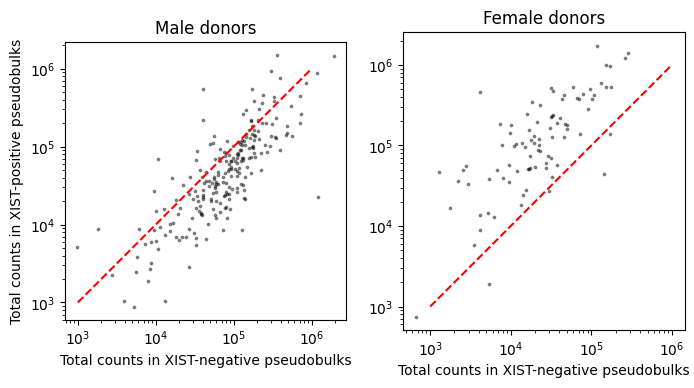

In [37]:
fig1,ax1=plt.subplots(1,2,figsize=(8,4))
assert (dds_m[dds_m.obs['xist']=='absent'].obs['donor-id'].values==dds_m[dds_m.obs['xist']=='present'].obs['donor-id'].values).all()
assert (dds_f[dds_f.obs['xist']=='absent'].obs['donor-id'].values==dds_f[dds_f.obs['xist']=='present'].obs['donor-id'].values).all()
ax1[0].scatter(dds_m[dds_m.obs['xist']=='absent'].obs['psbulk_counts'],dds_m[dds_m.obs['xist']=='present'].obs['psbulk_counts'],
            3,'k',alpha=0.4)
ax1[1].scatter(dds_f[dds_f.obs['xist']=='absent'].obs['psbulk_counts'],dds_f[dds_f.obs['xist']=='present'].obs['psbulk_counts'],
            3,'k',alpha=0.4)
xl = [1e3,1e6]
ax1[0].plot(xl,xl,'r--')
ax1[1].plot(xl,xl,'r--')
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')
ax1[1].set_xscale('log')
ax1[1].set_yscale('log')
ax1[0].set_aspect('equal', 'box')
ax1[1].set_aspect('equal', 'box')
ax1[0].set_ylabel('Total counts in XIST-positive pseudobulks')
ax1[0].set_xlabel('Total counts in XIST-negative pseudobulks')
ax1[1].set_xlabel('Total counts in XIST-negative pseudobulks')
ax1[0].set_title('Male donors')
ax1[1].set_title('Female donors')

In [38]:
def compare_gex_between_xist_posneg(gene,dds_m,dds_f):
    fig1,ax1=plt.subplots(1,2,figsize=(8,4))

    x = dds_m[dds_m.obs['xist']=='absent',gene]
    y = dds_m[dds_m.obs['xist']=='present',gene]
    ax1[0].scatter(dds_m[dds_m.obs['xist']=='absent',gene].layers['normed_counts']+1,
                   dds_m[dds_m.obs['xist']=='present',gene].layers['normed_counts']+1,
                3,'k',alpha=0.4)
    ax1[1].scatter(dds_f[dds_f.obs['xist']=='absent',gene].layers['normed_counts']+1,
                   dds_f[dds_f.obs['xist']=='present',gene].layers['normed_counts']+1,
                3,'k',alpha=0.4)
    xl=[1,1e3]
    ax1[0].plot(xl,xl,'r--')
    ax1[1].plot(xl,xl,'r--')
    ax1[0].set_xscale('log')
    ax1[1].set_xscale('log')
    ax1[0].set_yscale('log')
    ax1[1].set_yscale('log')
    ax1[0].set_xlabel('Normalized counts + 1 in XIST-negative')
    ax1[0].set_ylabel('Normalized counts + 1 in XIST-positive')
    ax1[1].set_xlabel('Normalized counts + 1 in XIST-negative')
    ax1[1].set_ylabel('Normalized counts + 1 in XIST-positive')
    ax1[0].set_title(gene+' in male samples')
    ax1[1].set_title(gene+' in female samples')
    fig1.tight_layout()

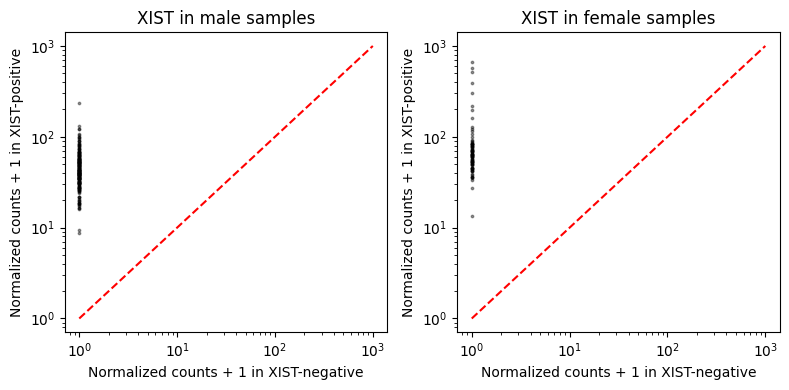

In [39]:
gene = 'XIST'
compare_gex_between_xist_posneg(gene,dds_m,dds_f)

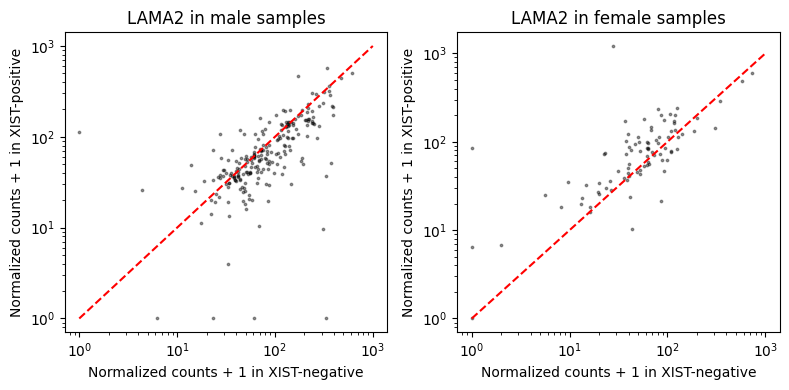

In [40]:
gene = 'LAMA2'
compare_gex_between_xist_posneg(gene,dds_m,dds_f)

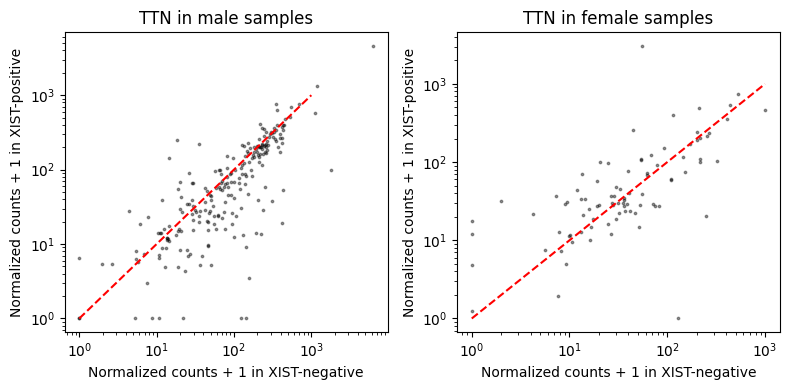

In [41]:
compare_gex_between_xist_posneg('TTN',dds_m,dds_f)

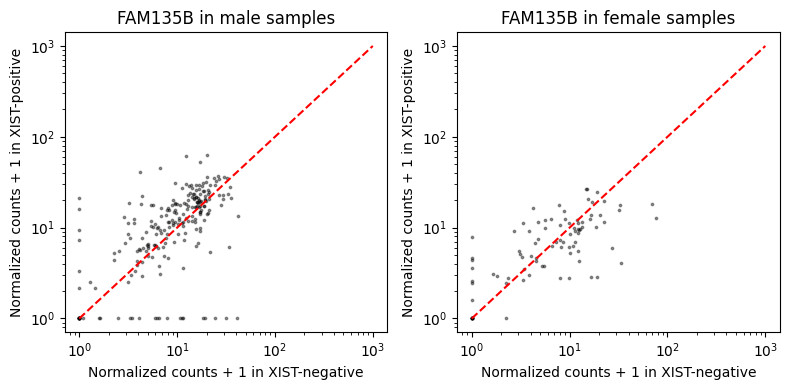

In [42]:
compare_gex_between_xist_posneg('FAM135B',dds_m,dds_f)

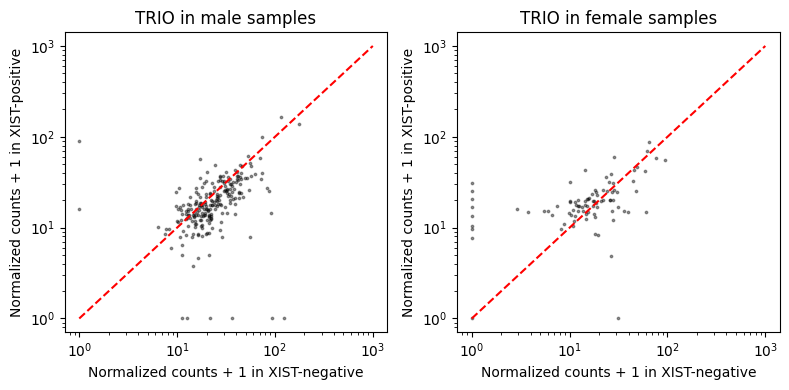

In [43]:
compare_gex_between_xist_posneg('TRIO',dds_m,dds_f)